In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ast

In [14]:
data = pd.read_csv("profile_results.csv")
data['times'] = data['times'].apply(ast.literal_eval)
data = data.explode('times', ignore_index=True)
data["times"] = data["times"].apply(pd.to_numeric, errors="coerce")
data


,data_structure,task,size,times
0,array,build,10,0.000011
1,array,build,10,0.000010
2,array,build,10,0.000010
3,array,build,10,0.000009
4,array,build,10,0.000012
...,...,...,...,...
875,VP_trees,find_closest,1000000,20.133609
876,VP_trees,find_closest,1000000,20.118901
877,VP_trees,find_closest,1000000,20.109120
878,VP_trees,find_closest,1000000,20.068960


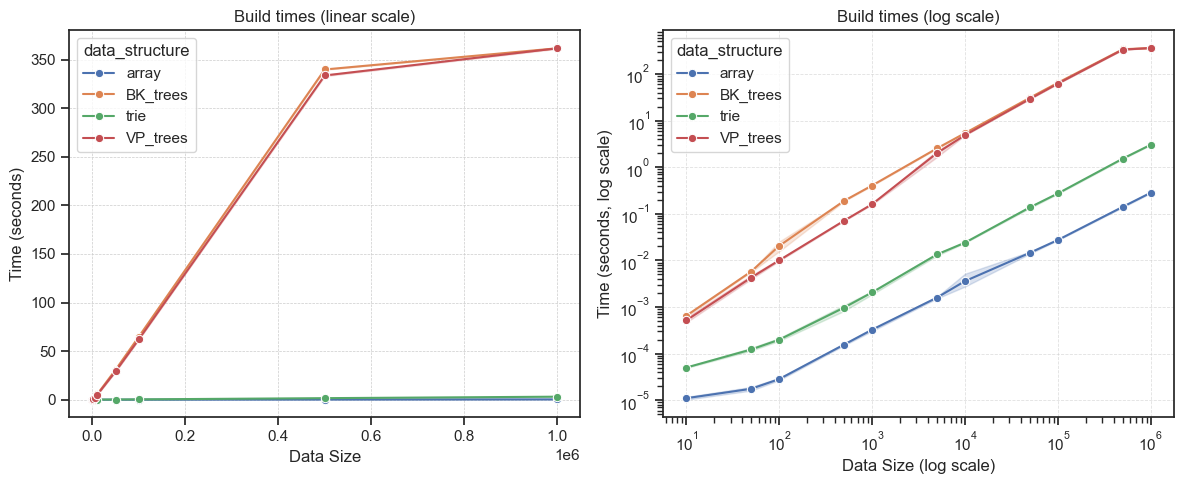

In [18]:
build_times = data[data.task == "build"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Linear scale plot ---
sns.lineplot(
    data=build_times,
    x="size",
    y="times",
    hue="data_structure",
    marker='o',
    ax=axes[0]
)
axes[0].set_title("Build times (linear scale)")
axes[0].set_xlabel("Data Size")
axes[0].set_ylabel("Time (seconds)")

# --- Log scale plot ---
sns.lineplot(
    data=build_times,
    x="size",
    y="times",
    hue="data_structure",
    marker='o',
    ax=axes[1]
)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_title("Build times (log scale)")
axes[1].set_xlabel("Data Size (log scale)")
axes[1].set_ylabel("Time (seconds, log scale)")

axes[0].grid(True, which="both", linestyle="--", linewidth=0.5)
axes[1].grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.6)

plt.tight_layout()
plt.savefig("../docs/build_times.pdf", format="pdf", bbox_inches="tight")
plt.show()

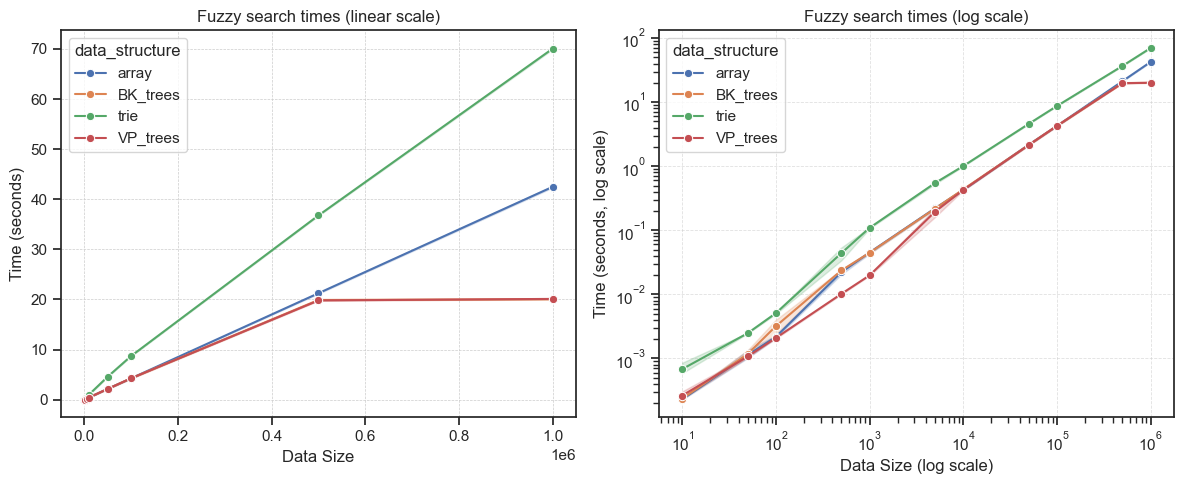

In [19]:
search_times = data[data.task == "find_closest"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Linear scale plot ---
sns.lineplot(
    data=search_times,
    x="size",
    y="times",
    hue="data_structure",
    marker='o',
    ax=axes[0]
)
axes[0].set_title("Fuzzy search times (linear scale)")
axes[0].set_xlabel("Data Size")
axes[0].set_ylabel("Time (seconds)")

# --- Log scale plot ---
sns.lineplot(
    data=search_times,
    x="size",
    y="times",
    hue="data_structure",
    marker='o',
    ax=axes[1]
)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_title("Fuzzy search times (log scale)")
axes[1].set_xlabel("Data Size (log scale)")
axes[1].set_ylabel("Time (seconds, log scale)")

axes[0].grid(True, which="both", linestyle="--", linewidth=0.5)
axes[1].grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.6)

plt.tight_layout()
plt.savefig("../docs/search_times.pdf", format="pdf", bbox_inches="tight")
plt.show()
